In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# loading the dataset to pandas Dataform
loan_dataset = pd.read_csv('train.csv')

In [3]:
loan_dataset.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# deleting the missing values
loan_dataset = loan_dataset.dropna()

In [6]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [8]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [9]:
# replacing value,of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace = '3+', value=4)

In [10]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [11]:
# converting categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


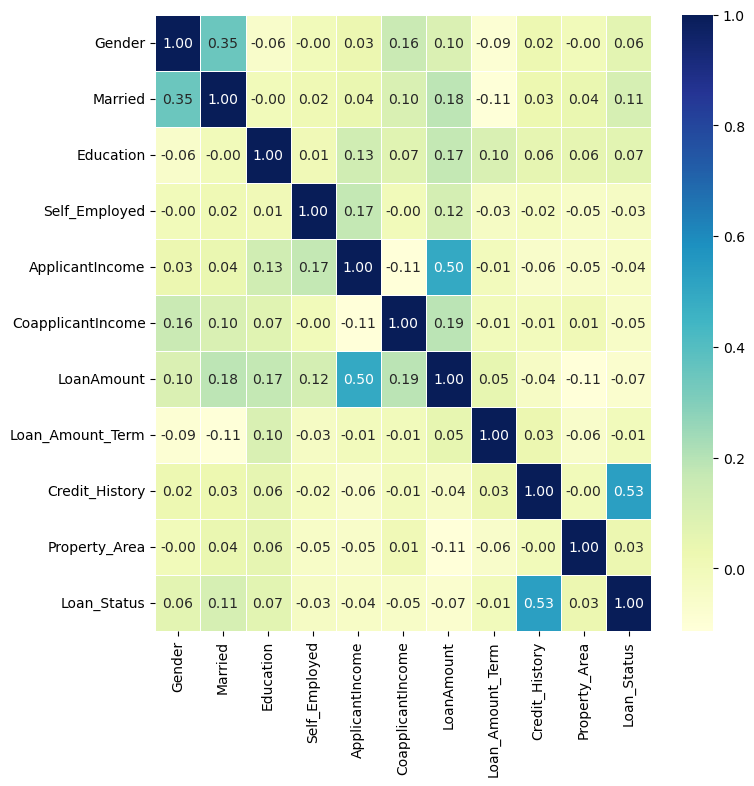

In [12]:
#PRINTING HEAT MAP FOR GETTING DEPENDENT VALUE
corr_matrix = loan_dataset.corr()
fig,ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr_matrix,annot=True,lw=0.5,fmt=".2f",cmap="YlGnBu")

In [13]:
print(loan_dataset)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
5    LP001011       1        1          2          1              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1          4          1              0   
611  LP002983       1        1          1          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

In [14]:
#seprating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status','Credit_History','Property_Area','LoanAmount','Loan_Amount_Term'],axis=1)
Y = loan_dataset['LoanAmount']

In [15]:
# #seprating the data and label
# X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
# Y = loan_dataset['Loan_Status']

In [16]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  
1               1508.0  
2            

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [18]:
print(X.shape,X_train.shape,X_test.shape)

(480, 7) (432, 7) (48, 7)


BY MULTIPAL LINERAL REGRATION

In [20]:
import matplotlib.pyplot as plt
import pandas 
import numpy
from scipy import stats
import statsmodels.api
from sklearn import linear_model
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [55]:
#seprating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status','Credit_History','Property_Area','LoanAmount','Loan_Amount_Term','Gender',  'Married' ,'Dependents','Education' , 'Self_Employed'],axis=1)
Y = loan_dataset['LoanAmount']
print(X)
print(Y)

     ApplicantIncome  CoapplicantIncome
1               4583             1508.0
2               3000                0.0
3               2583             2358.0
4               6000                0.0
5               5417             4196.0
..               ...                ...
609             2900                0.0
610             4106                0.0
611             8072              240.0
612             7583                0.0
613             4583                0.0

[480 rows x 2 columns]
1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 480, dtype: float64


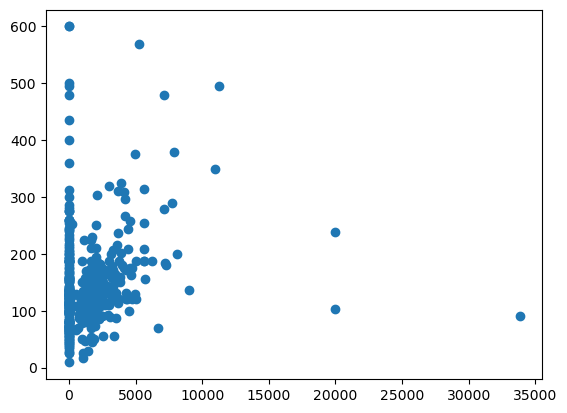

In [56]:
#FROM HEAT MAP WE CAN SEE LOAN STATUS HIGHLY DEPENDENT ON CREADIT HISTRY
plt.scatter(loan_dataset["CoapplicantIncome"],loan_dataset["LoanAmount"])
plt.show()

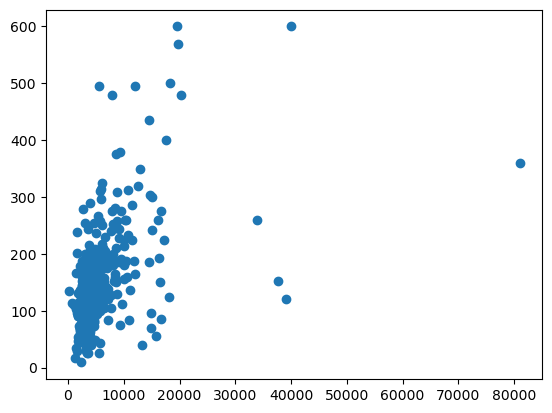

In [57]:
#FROM HEAT MAP WE CAN SEE LOAN STATUS HIGHLY DEPENDENT ON CREADIT HISTRY
plt.scatter(loan_dataset["ApplicantIncome"],loan_dataset["LoanAmount"])
plt.show()

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

In [62]:
linearreg=linear_model.LinearRegression()

In [63]:
linearreg.fit(X,Y)

LinearRegression()

In [64]:
y_pred=linearreg.predict(X_test)


In [65]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10790.256950538853


By RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
randforest = RandomForestRegressor()
randforest.fit(X_train, Y_train)

RandomForestRegressor()

In [29]:
y1_pred = randforest.predict(X_test)

In [30]:
print(y1_pred)

[141.48       162.48       129.87       106.14       161.47
 322.06        99.72       123.32       186.75       137.845
 161.72       143.16       129.63       239.84       183.48
  97.53       144.61        89.5        103.83        93.92
 212.78        75.41       165.6        131.16       160.14
 100.53        59.02083333 119.12       123.41       137.69
 234.44        51.88933333 171.97        77.8        211.48
  97.22       161.39       137.94       117.12        95.41
 110.72       147.33       153.05        76.74        93.59
 125.81        93.02       290.5       ]


In [31]:
mse = mean_squared_error(Y_test, y1_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3463.225125822338


BY Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
tree_reg = DecisionTreeRegressor(random_state=42)

In [34]:
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
y_pred = tree_reg.predict(X_train)

In [53]:
treedf= pd.DataFrame({"actual_data":Y_test,"predicted_data":y_pred})
treedf

,actual_data,predicted_data
257,94.0,156.575447
513,70.0,154.451337
234,140.0,142.094494
133,25.0,119.670951
244,123.0,143.411746
443,152.0,367.561577
193,76.0,111.260391
273,150.0,137.434120
243,108.0,171.501957
412,218.0,132.304317


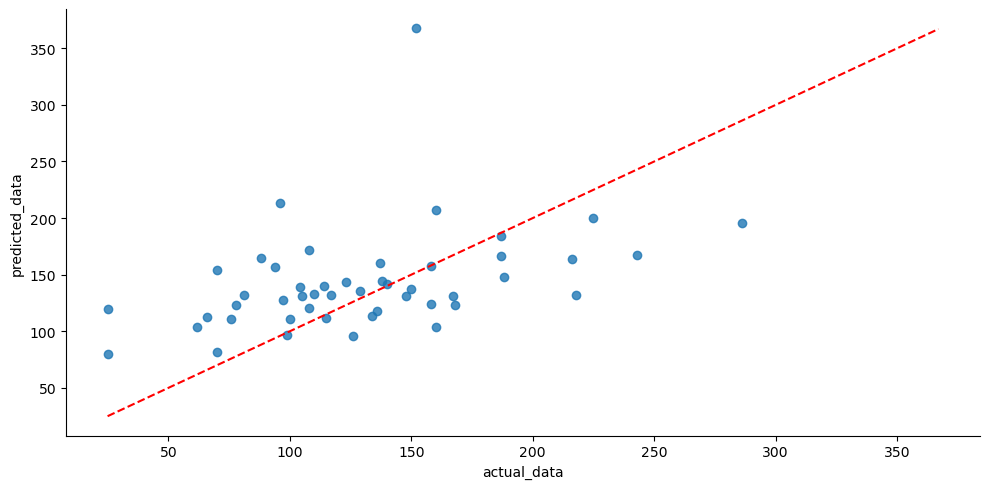

In [54]:
predict_vs_actual_data(actual_data='actual_data',predicted_data='predicted_data',dataframe=lassodf)

In [36]:
print(y_pred)

[155. 100. 145. 155. 187. 260.  67.  95. 187. 115. 185. 128. 116. 188.
 205.  96. 150. 113. 115.  71. 125.  56. 142. 126. 140. 113.  66. 137.
 140. 160. 175.  66. 176. 100. 136.  87. 150. 103. 136.  67. 110. 118.
 158.  45. 110. 136.  87. 304.]


In [37]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3922.8333333333335


by Lasso Regression

In [38]:
from sklearn.linear_model import Lasso

In [39]:
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.3)

In [40]:
y_pred = lasso.predict(X_test)


In [41]:
print(y_pred)

[156.57544653 154.45133705 142.09449402 119.67095119 143.41174579
 367.56157718 111.26039139 137.43411999 171.50195747 132.30431685
 131.50480503 144.20026218 140.07302709 206.8008604  166.36471247
 111.01575008 131.70313358 127.57093872 113.43966782 111.43553077
 199.95151569 103.87506366 163.55700608 157.73418681 131.63796636
 131.55876011  81.46312047 139.08353159 124.17625472 147.86139509
 184.46553554  96.62616966 167.15222215 120.25414321 195.86554053
 133.30584474 165.14671553 159.98175676 122.88566528 103.86298463
  96.21484394 130.96146492 135.86381301 123.25450038  79.88286734
 117.99351058 112.38092524 213.16992429]


In [42]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3066.300142608003


In [43]:
def predict_vs_actual_data(actual_data,predicted_data,dataframe,color="red"):2wz
    sns.lmplot(x=actual_data, y=predicted_data, data=dataframe, fit_reg=False,height=5,aspect=2)
    d_line= np.arange(dataframe.min().min(), dataframe.max().max())
    plt.plot(d_line, d_line, color=color, linestyle='--')
    plt.show()

In [46]:
lassodf= pd.DataFrame({"actual_data":Y_test,"predicted_data":y_pred})
lassodf

,actual_data,predicted_data
257,94.0,156.575447
513,70.0,154.451337
234,140.0,142.094494
133,25.0,119.670951
244,123.0,143.411746
443,152.0,367.561577
193,76.0,111.260391
273,150.0,137.434120
243,108.0,171.501957
412,218.0,132.304317


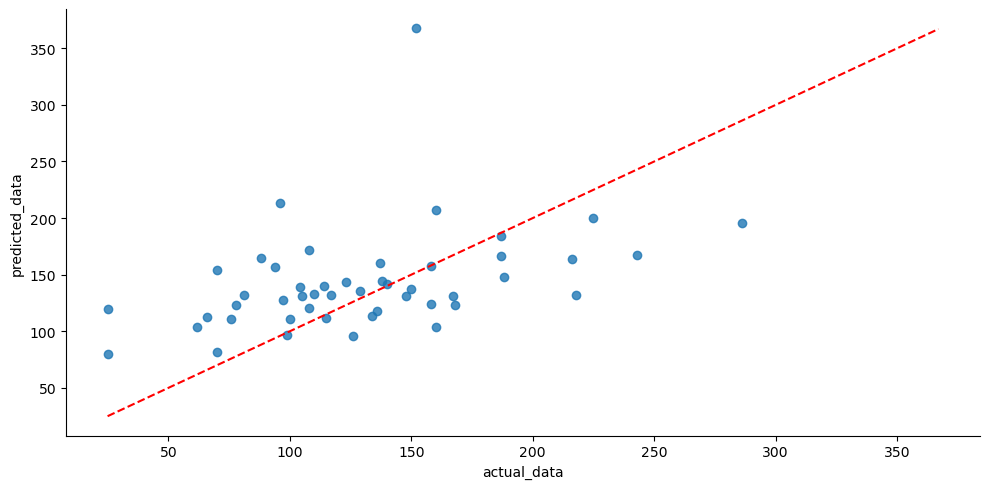

In [48]:
predict_vs_actual_data(actual_data='actual_data',predicted_data='predicted_data',dataframe=lassodf)